<a href="https://colab.research.google.com/github/makeshmr/Exploratory-Data-Analysis-Case-Study-Rise-in-Accidents-Cases-in-USA/blob/main/Exploratory_Data_Analysis_Case_Study_Rise_in_Accidents_Cases_in_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <center>**Exploratory Data Analysis Case Study : Rise in Accidents Cases in USA**</center>

<center>
    <img src="https://i.pinimg.com/originals/44/85/08/448508ebd4e33634aa340715ae00e802.gif" width =600 height=400/>
</center>

Exploratory Data Analysis on "US Accidents" dataset to find out and visualize different trends including impact of COVID-19 on traffic behavior and accidents, environmental stimuli on accident occurrence and accident hotspot locations in order to get control over the same.










## **What is EDA (Exploratory Data Analysis)?**

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns. 

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

## **Download the Dataset from Kaggle !!**


Kaggle, a subsidiary of Google LLC, is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.

In [ ]:
#install required libraries
!pip install opendatasets numpy pandas --upgrade --quiet


**Pandas** is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

**NumPy** is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation etc.

**opendatasets** is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.



In [ ]:
import pandas as  pd
import numpy as np

### **US-Accidents: A Countrywide Traffic Accident Dataset**

<center><a href="https://imgur.com/lVxwWer"><img src="https://imgur.com/lVxwWer.jpg" title="source: imgur.com" width=1000/></a></center>

This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is continuously being collected from February 2016, using several data providers, including multiple APIs that provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 1.5 million accident records in this dataset.

#### **Downloading a dataset**

Datasets can be downloaded within a Jupyter notebook or Python script using the opendatasets.download helper function.

#### **Kaggle Credentials**
Opendatasets uses the Kaggle Official API for donwloading dataset from Kaggle. Follow these steps to find your API credentials:

1. Sign in to [kaggle](https://kaggle.com/), then click on your profile picture on the top right and select "My Account" from the menu.

2. Scroll down to the "API" section and click "Create New API Token". This will download a file kaggle.json with the following contents:

**<center>{"username":"YOUR_USERNAME","key":"YOUR_KAGGLE_KEY"}</center>**

3. When you run opendatsets.download, you will be asked to enter your username & Kaggle API, which you can get from the file downloaded in step 2.

In [ ]:
#importing opendataset library to download the dataset from kaggle
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: makeshmr
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:03<00:00, 84.8MB/s]


In [ ]:
us_accidents_csv= './us-accidents/US_Accidents_Dec21_updated.csv'

In [ ]:
%%time
accidents_df = pd.read_csv(us_accidents_csv)

CPU times: user 35.3 s, sys: 3.61 s, total: 38.9 s
Wall time: 40.8 s


In [ ]:
accidents_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
accidents_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

```us_accidents_schema_df``` describes the columns specified in the dataset ```us_accidents_csv```

In [ ]:

jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents


'https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents'

## **Data Preparation and Cleaning with Pandas**



Let's load the US accidents data into a Pandas dataframe, and track the amount of time it takes using the %%time Jupyter magic command.

In [ ]:
%%time
accidents_df

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10.3 µs


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


Let's take a look at the first few rows, and gather some information about the dataset.

In [ ]:
accidents_df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day


In [ ]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

The dataset contains 2.9 million rows, 47 columns and occupies 780 MB of memory (RAM). Let's look at some strategies to load the data faster and use less memory.



### ***Working with a sample***

When working with a large dataset, sometimes it's better to work with a sample to set up your notebook, and then repeat your analysis with the entire dataset, to save time. You can use the `nrows` argument to supply the number of rows to be read.

In [ ]:
%%time
accidents_sample_df = pd.read_csv(us_accidents_csv,  
                                  nrows=1000,
)

CPU times: user 26.7 ms, sys: 79 µs, total: 26.8 ms
Wall time: 31.1 ms


In [ ]:
accidents_sample_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A-996,2,2016-03-23 05:55:55,2016-03-23 11:55:55,37.425920,-122.098790,37.430420,-122.103520,0.405,At San Antonio Rd/Exit 400B/Exit 400C - Accide...,...,False,False,False,False,False,False,Night,Night,Night,Day
996,A-997,2,2016-03-23 06:39:54,2016-03-23 12:39:54,37.757450,-122.211310,37.750850,-122.205490,0.556,At 66th Ave - Accident. Center lane blocked.,...,False,False,False,False,False,False,Night,Night,Day,Day
997,A-998,2,2016-03-23 06:45:09,2016-03-23 12:45:09,37.316480,-121.967460,37.318100,-121.978100,0.595,At Saratoga Ave - Accident. Left lane blocked.,...,False,False,False,False,False,False,Night,Day,Day,Day
998,A-999,2,2016-03-23 06:56:44,2016-03-23 12:56:44,37.444150,-122.268800,37.444030,-122.259300,0.521,At Farm Hill Blvd - Accident. Left lane blocked.,...,False,False,False,False,False,False,Night,Day,Day,Day


### **Loading only the required coloumns**

You can provide the usecols argument to read_csv create a dataframe with just the given columns. This reduces the loading time, and uses lesser memory.

In [ ]:
selected_cols = [#accidents details
                 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng','End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
                 #location of accidents
                'City', 'County', 'State', 'Country',
                 #Weather condition during accidents
                 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
                 #Causes of accidents
                 'Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop',
                 #Day_Night_Time
                 'Sunrise_Sunset']

In [ ]:
accidents_sample_df1 = pd.read_csv(#only columns required for eda
                                  us_accidents_csv,
                                  usecols=selected_cols, 
                                  nrows=1000)

In [ ]:
accidents_sample_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           1000 non-null   int64  
 1   Start_Time         1000 non-null   object 
 2   End_Time           1000 non-null   object 
 3   Start_Lat          1000 non-null   float64
 4   Start_Lng          1000 non-null   float64
 5   End_Lat            1000 non-null   float64
 6   End_Lng            1000 non-null   float64
 7   Distance(mi)       1000 non-null   float64
 8   Description        1000 non-null   object 
 9   City               1000 non-null   object 
 10  County             1000 non-null   object 
 11  State              1000 non-null   object 
 12  Country            1000 non-null   object 
 13  Weather_Timestamp  997 non-null    object 
 14  Temperature(F)     996 non-null    float64
 15  Wind_Chill(F)      544 non-null    float64
 16  Humidity(%)        992 no

### **Using smaller Datatype and parsing datetime argument**

By default, Pandas uses large datatypes like `int64` and `float64` for numerical data. However, in many cases the data in the CSV file can be represented using a smaller data type such as `int32`, `float32`, `int16` etc. 

Date columns can be specified using the `parse_dates` argument.
 

In [ ]:

selected_dtypes = {
    'Severity': 'int16',
    'Start_Lat': 'float32',
    'Start_Lng': 'float32',
    'End_Lat': 'float32',
    'End_Lng': 'float32',
    'Distance(mi)': 'float32'   
}

In [ ]:
%%time
accidents_sample_df3 = pd.read_csv(us_accidents_csv, 
                            usecols=selected_cols, 
                            dtype=selected_dtypes, 
                            parse_dates=['Start_Time', 'End_Time','Weather_Timestamp'],
                            nrows=1000)

CPU times: user 20 ms, sys: 1.13 ms, total: 21.2 ms
Wall time: 24.4 ms


In [ ]:
accidents_sample_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Severity           1000 non-null   int16         
 1   Start_Time         1000 non-null   datetime64[ns]
 2   End_Time           1000 non-null   datetime64[ns]
 3   Start_Lat          1000 non-null   float32       
 4   Start_Lng          1000 non-null   float32       
 5   End_Lat            1000 non-null   float32       
 6   End_Lng            1000 non-null   float32       
 7   Distance(mi)       1000 non-null   float32       
 8   Description        1000 non-null   object        
 9   City               1000 non-null   object        
 10  County             1000 non-null   object        
 11  State              1000 non-null   object        
 12  Country            1000 non-null   object        
 13  Weather_Timestamp  997 non-null    datetime64[ns]
 14  Temperatu

The load time and memory gains depend on the nature of the dataset. In this case, it leads to a 25% reduction in memory usage, with about the same load time. However, keep in mind that we no longer need to parse dates columns separately, which itself would take a few seconds for this dataset.

### **Working with Categorical Data**

Consider the `City` column of the `accidents_sample_df3`. While the values in the column are strings, there are only a limited number of values or _categories_ that occur in the column. `City` is a _categorical column_.

In [ ]:
city = accidents_sample_df.City

In [ ]:
city.unique()

array(['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg',
       'Cleveland', 'Lima', 'Westerville', 'Jamestown', 'Freeport',
       'Columbus', 'Toledo', 'Roanoke', 'Ft Mitchell', 'Edinburgh',
       'Fairborn', 'Shelbyville', 'Greensburg', 'Saint Paul',
       'Parkersburg', 'Indianapolis', 'Dundee', 'Jeffersonville',
       'Pittsburgh', 'Lewis Center', 'Dunkirk', 'Redkey', 'Milton',
       'Willshire', 'Straughn', 'Cambridge Springs', 'Fremont',
       'Louisville', 'South Charleston', 'Edinboro', 'Buckhannon',
       'Lockbourne', 'Painesville', 'Washington', 'Dunbar', 'Angola',
       'Edon', 'Medina', 'De Mossville', 'New Albany', 'Charleston',
       'Fort Wayne', 'Burnsville', 'Bedford', 'Clarksville', 'Lakewood',
       'Richfield', 'Sewickley', 'Independence', 'Westlake', 'Erlanger',
       'Grove City', 'Monroe', 'West Middlesex', 'Gaston', 'Economy',
       'Fairmount', 'Hagerstown', 'Walton', 'Crittenden', 'Coraopolis',
       'Holland', 'Greenfield', 'Anderson', 

In [ ]:
city.nunique()

247

In [ ]:
city.value_counts()

Cincinnati    113
Columbus      113
Cleveland      73
Louisville     45
Akron          39
             ... 
New Haven       1
Middletown      1
Hansford        1
Lucasville      1
Livermore       1
Name: City, Length: 247, dtype: int64

We can convert the string column to a categorical column in Pandas by changing its data type.

In [ ]:
accidents_sample_df3['City'] = accidents_sample_df3['City'].astype('category')

In [ ]:
accidents_sample_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Severity           1000 non-null   int16         
 1   Start_Time         1000 non-null   datetime64[ns]
 2   End_Time           1000 non-null   datetime64[ns]
 3   Start_Lat          1000 non-null   float32       
 4   Start_Lng          1000 non-null   float32       
 5   End_Lat            1000 non-null   float32       
 6   End_Lng            1000 non-null   float32       
 7   Distance(mi)       1000 non-null   float32       
 8   Description        1000 non-null   object        
 9   City               1000 non-null   category      
 10  County             1000 non-null   object        
 11  State              1000 non-null   object        
 12  Country            1000 non-null   object        
 13  Weather_Timestamp  997 non-null    datetime64[ns]
 14  Temperatu

Similarly, other categorical columns we can find the from the dataset are 
`County`,`State`,`Country`, and `Sunrise_Sunset`,`Weather_Condition`.

In [ ]:
accidents_sample_df3['County'] = accidents_sample_df3['County'].astype('category')
accidents_sample_df3['State'] = accidents_sample_df3['State'].astype('category')
accidents_sample_df3['Country'] = accidents_sample_df3['County'].astype('category')
accidents_sample_df3['Sunries_Sunset'] = accidents_sample_df3['Sunrise_Sunset'].astype('category')
accidents_sample_df3['Weather_Condition'] = accidents_sample_df3['Weather_Condition'].astype('category')

In [ ]:
accidents_sample_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Severity           1000 non-null   int16         
 1   Start_Time         1000 non-null   datetime64[ns]
 2   End_Time           1000 non-null   datetime64[ns]
 3   Start_Lat          1000 non-null   float32       
 4   Start_Lng          1000 non-null   float32       
 5   End_Lat            1000 non-null   float32       
 6   End_Lng            1000 non-null   float32       
 7   Distance(mi)       1000 non-null   float32       
 8   Description        1000 non-null   object        
 9   City               1000 non-null   category      
 10  County             1000 non-null   category      
 11  State              1000 non-null   category      
 12  Country            1000 non-null   category      
 13  Weather_Timestamp  997 non-null    datetime64[ns]
 14  Temperatu

### **Numeric Categorical columns**

In [ ]:
# counting number of numerical columns
numerics=['int16','int32','int64','float16','float32','float64']
numeric_accidents_df = accidents_sample_df3.select_dtypes(include=numerics)
len(numeric_accidents_df.columns)

13

In [ ]:
numeric_accidents_df

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.108910,-83.092857,40.112061,-83.031868,3.230,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.865421,-84.062798,39.865009,-84.048729,0.747,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.102661,-84.524681,39.102089,-84.523956,0.055,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,41.062130,-81.537842,41.062168,-81.535469,0.123,39.0,NaN,55.0,29.65,10.0,NaN,NaN
4,3,39.172394,-84.492790,39.170475,-84.501801,0.500,37.0,29.8,93.0,29.69,10.0,10.4,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,37.425919,-122.098793,37.430420,-122.103523,0.405,48.2,NaN,82.0,30.27,30.0,5.8,NaN
996,2,37.757450,-122.211311,37.750851,-122.205490,0.556,46.9,NaN,80.0,30.27,10.0,NaN,NaN
997,2,37.316479,-121.967461,37.318100,-121.978104,0.595,46.0,NaN,86.0,30.27,10.0,NaN,NaN
998,2,37.444149,-122.268799,37.444031,-122.259300,0.521,48.2,NaN,82.0,30.28,10.0,NaN,NaN


The column Severity consists of categories too, even though its values are numeric.

In [ ]:
accidents_sample_df3.Severity.value_counts()

2    577
4    228
3    195
Name: Severity, dtype: int64

Let's convert it into a categorical column.

In [ ]:
accidents_sample_df.Severity = accidents_sample_df.Severity.astype('category')

In [ ]:
accidents_sample_df.Severity

0      3
1      2
2      2
3      2
4      3
      ..
995    2
996    2
997    2
998    2
999    2
Name: Severity, Length: 1000, dtype: category
Categories (3, int64): [2, 3, 4]

In [ ]:
accidents_sample_df.Severity.cat.categories

Int64Index([2, 3, 4], dtype='int64')

### **Parsing the arguments to  entire Dataset**

The commands we run through the sameple dataset containing 1000 rows, we full parse the arguments to the entire dataset

In [ ]:
#Loading only te required columns
selected_columns = [#accidents details
                 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng','End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
                 #location of accidents
                'City', 'County', 'State', 'Country',
                 #Weather condition during accidents
                 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
                 #Causes of accidents
                 'Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop',
                 #Day_Night_Time
                 'Sunrise_Sunset']

#Using smaller Datatype and parsing datetime argument

selected_dtypes = {
    'Severity': 'int16',
    'Start_Lat': 'float32',
    'Start_Lng': 'float32',
    'End_Lat': 'float32',
    'End_Lng': 'float32',
    'Distance(mi)': 'float32'   
}


In [ ]:
us_accidents_df = pd.read_csv(
                                  us_accidents_csv,
                                  usecols = selected_columns,
                                  dtype = selected_dtypes,
                                  parse_dates = ['Start_Time', 'End_Time','Weather_Timestamp']
                                  )

In [ ]:
#Workig with  Categorical and Numeric categorical Data


In [ ]:
us_accidents_df['City'] = us_accidents_df['City'].astype('category')
us_accidents_df['County'] = us_accidents_df['County'].astype('category')
us_accidents_df['State'] = us_accidents_df['State'].astype('category')
us_accidents_df['Country'] = us_accidents_df['Country'].astype('category')
us_accidents_df['Sunrise_Sunset'] = us_accidents_df['Sunrise_Sunset'].astype('category')
us_accidents_df['Weather_Condition'] = us_accidents_df['Weather_Condition'].astype('category')

In [ ]:
us_accidents_df.Severity = us_accidents_df.Severity.astype('category')

In [ ]:
us_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 37 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Severity           category      
 1   Start_Time         datetime64[ns]
 2   End_Time           datetime64[ns]
 3   Start_Lat          float32       
 4   Start_Lng          float32       
 5   End_Lat            float32       
 6   End_Lng            float32       
 7   Distance(mi)       float32       
 8   Description        object        
 9   City               category      
 10  County             category      
 11  State              category      
 12  Country            category      
 13  Weather_Timestamp  datetime64[ns]
 14  Temperature(F)     float64       
 15  Wind_Chill(F)      float64       
 16  Humidity(%)        float64       
 17  Pressure(in)       float64       
 18  Visibility(mi)     float64       
 19  Wind_Direction     object        
 20  Wind_Speed(mph)    float

### **Handling missing data**

Missing data in Pandas is indicate using np.nan. We can find the number of missing values in each column of a dataframe using the following expression:

In [ ]:
us_accidents_df.isna().sum()

Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
End_Lat                   0
End_Lng                   0
Distance(mi)              0
Description               0
City                    137
County                    0
State                     0
Country                   0
Weather_Timestamp     50736
Temperature(F)        69274
Wind_Chill(F)        469643
Humidity(%)           73092
Pressure(in)          59200
Visibility(mi)        70546
Wind_Direction        73775
Wind_Speed(mph)      157944
Precipitation(in)    549458
Weather_Condition     70636
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop        

The `City` and `Sunrise_Sunset` columns have `137` and `2867` missing values, respectively.



We have the following options for dealing with missing values in numerical columns:

1. Leave them as is, if they won't affect your analysis
2. Replace them with an average 
3. Replace them with some other fixed value
4. Remove the rows containing missing values
5. Use the values from other rows & columns to estimate the missing value (imputation)



We wil remove the rows that contains missing values 

In [ ]:
fixed_df = us_accidents_df.dropna(subset=['City', 'Sunrise_Sunset'])

In [ ]:
fixed_df.isna().sum()

Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
End_Lat                   0
End_Lng                   0
Distance(mi)              0
Description               0
City                      0
County                    0
State                     0
Country                   0
Weather_Timestamp     50171
Temperature(F)        68689
Wind_Chill(F)        469010
Humidity(%)           72505
Pressure(in)          58619
Visibility(mi)        69918
Wind_Direction        73176
Wind_Speed(mph)      157336
Precipitation(in)    548816
Weather_Condition     70025
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop        

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents


'https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents'

## **Exploratory Analysis and Visualization**


Before we ask questions about the accidents dataset, it would help to understand the about the accidents severity, causes, location. It's essential to explore these variables to understand how explanatory the dataset. 

Let's begin by importing `matplotlib.pyplot`,`seaborn` oher data visualizing tools.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents


'https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents'

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1S8LdQuNiA350_8L4jg0hPgzy277ujPvY" align="left" hspace="5px" vspace="" width="20" height="20" ></p>

#### <font size="4">**Severity of Accidents**</font>

Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).



**What Are Graph Objects?**

The figures created, manipulated and rendered by the plotly Python library are represented by tree-like data structures which are automatically serialized to JSON for rendering by the Plotly.js JavaScript library. These trees are composed of named nodes called "attributes", with their structure defined by the Plotly.js figure schema, which is available in machine-readable form. The plotly.graph_objects module (typically imported as go) contains an automatically-generated hierarchy of Python classes which represent non-leaf nodes in this figure schema

In [ ]:
# create a dataframe of Severity and the corresponding accident cases
severity_df = us_accidents_df['Severity'].value_counts()

In [ ]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnelarea(
    text = ["Severity - 2","Severity - 3", "Severity - 4", "Severity - 1"],
    values = severity_df.values,
    marker = {"colors": ['#14a3ee', '#b4e6ee', '#fdf4b8', '#ff4f4e'],
                "line": {"color": ["#e8e8e8", "wheat", "wheat", "wheat"], "width": [7, 0, 0, 2]}}
    ))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="FloralWhite",
    title = "<b>Impact on the Traffic due to the Accidents</b>",
    title_font_family="Times New Roman",
    title_font_color="black",
)

fig.show()

- Around 90% of the road accidents, the impact on the traffic was Moderate (Severity-2).
- The impact on the traffic was highly severe due to road accidents i.e.(Severity > 2) is about 9% 

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1wDgnslui9hD7EtyE3lJAKQHoJ2xkn0Gr" align="left" hspace="10px" vspace="px" width="20" height="30" ></p>

#### <font size="4">**Year-wise and Month-wise Analysis**</font>

In this dataset we have ```Start_Time & End_Time``` for the timings of each accident. We will use this columns to find the year, month, day and hour wise occurence of accidents cases in US


**Yearly Analysis**

In [ ]:
#panda series with year wise accidents counts
us_accidents_df.Start_Time.dt.year.value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64

```Value_counts``` argument is used to fetch the accidents respectively in each year and it renders a ```panda.series```

In [ ]:
#changing into dataframe
pd.DataFrame(us_accidents_df.Start_Time.dt.year.value_counts())

,Start_Time
2021,1511745
2020,625864
2019,258615
2017,163918
2018,163176
2016,122024


In [ ]:
#changing the column heading to year and cases and sorting out yearwise
year_df=pd.DataFrame(us_accidents_df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year','Start_Time':'Cases'}).sort_values(by='Year',ascending=True)




We'll use Python libraries ```Matplotlib``` and ```Seaborn``` to learn and apply some popular data visualization techniques. We'll use the words chart, plot, and graph interchangeably in this tutorial.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns




**Bar charts** are quite similar to line charts, i.e., they show a sequence of values. However, a bar is shown for each value, rather than points connected by lines. We can use the `plt.bar` function to draw a bar chart.

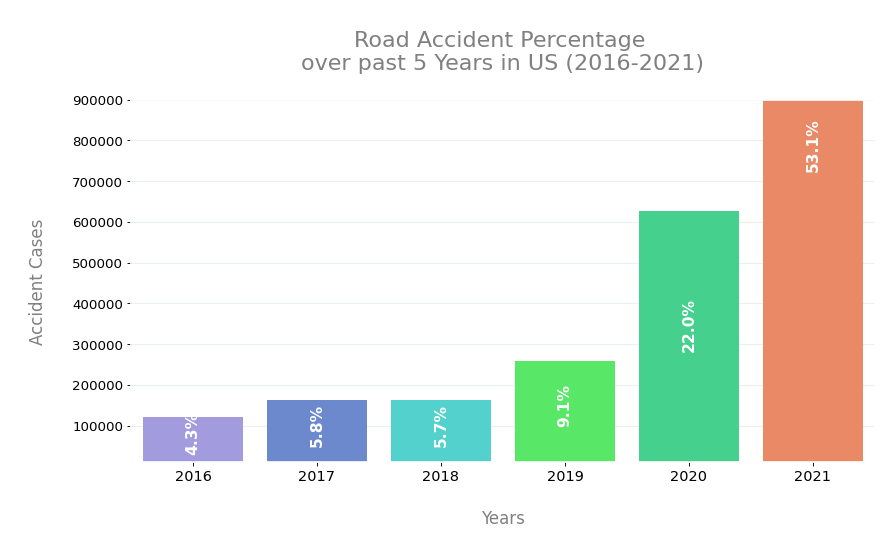

In [ ]:

fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=year_df['Cases'], x=year_df['Year'], palette=['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53','#2ee88e','#FF7F50'])



plt.ylim(10000, 900000)
plt.title('\nRoad Accident Percentage \nover past 5 Years in US (2016-2021)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nYears\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)



total = us_accidents_df.shape[0]
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 
    y = p.get_y() + p.get_height()/2 - 25000
    ax.annotate(percentage, (x, y),rotation=90, size = 14,ha ='center',weight='bold',color='white')


ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=0.3)


- From the above figure, we can conclude that in last 6 years (2016-2021) in US accidents percentage has increased significantly.

- 75% of the total road accident records of last 6 years happened only within last 2 years (2020, 2021).

**Monthly Analysis**

In [ ]:
month_df=pd.DataFrame(us_accidents_df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month','Start_Time':'Cases'}).sort_values(by='Month',ascending=True)


In [ ]:
month_df.head(2)

,Month,Cases
5,1,198365
6,2,194995


Python defines **an inbuilt module calendar that handles operations related to the calendar**. The calendar module allows output calendars like the program and provides additional useful functions related to the calendar

In [ ]:
import calendar
month_df['Month'] = list(calendar.month_name)[1:]

Here we  the `use **calendar** library to change ```Month``` represented as numeric to strings

In [ ]:
month_df.head(2)

,Month,Cases
5,January,198365
6,February,194995


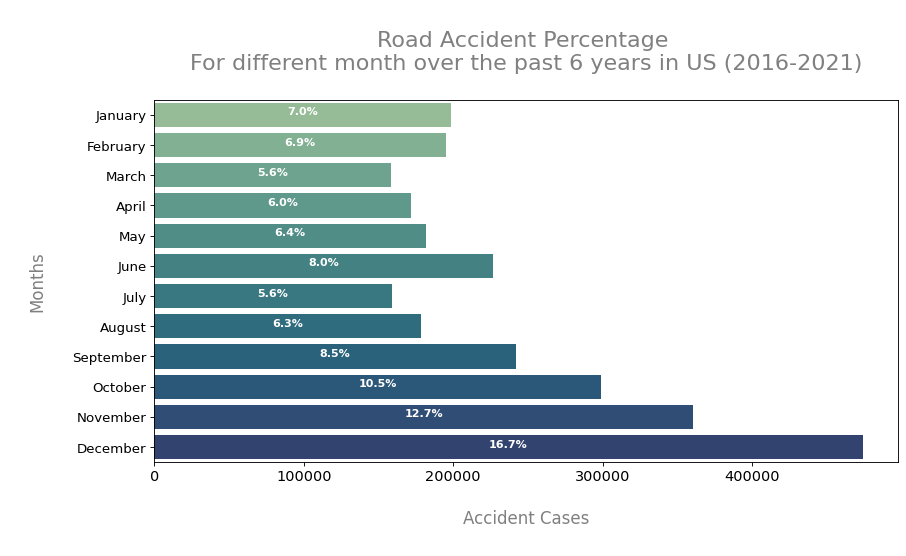

In [ ]:
#sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

# Plot the total crashes
ax=sns.barplot(x=month_df['Cases'], y=month_df['Month'], palette='crest')

# Add a legend and informative axis label

plt.title('\nRoad Accident Percentage \nFor different month over the past 6 years in US (2016-2021)\n', size=20, color='grey')
plt.ylabel('\nMonths\n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12);

#adding percentage 
total = us_accidents_df.shape[0]
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    y = p.get_y() + p.get_height()/2
    x = p.get_x() + p.get_width()/2 -100
    ax.annotate(percentage, (x, y),rotation=0, size = 10,ha ='center',weight='bold',color='white')


- The maximum cases occured in the month December is around(17%) and July & March are the months with least accidents occured and is about (5.6%).

- The accidents drastically increased during the month October to December.

**Daily Analaysis**

In [ ]:
day_df = pd.DataFrame(us_accidents_df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'}).sort_values(by='Day', ascending=True)

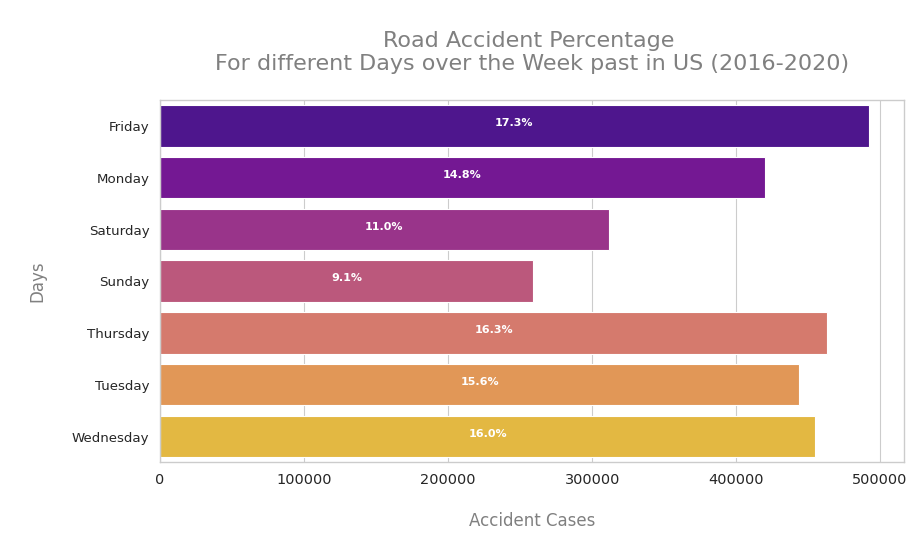

In [ ]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

# Plot the total crashes
ax=sns.barplot(x=day_df['Cases'], y=day_df['Day'], palette='plasma')

# Add a legend and informative axis label

plt.title('\nRoad Accident Percentage \nFor different Days over the Week past in US (2016-2020)\n', size=20, color='grey')
plt.ylabel('\nDays\n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12);

#adding percentage 
total = us_accidents_df.shape[0]
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    y = p.get_y() + p.get_height()/2
    x = p.get_x() + p.get_width()/2 -100
    ax.annotate(percentage, (x, y),rotation=0, size = 10,ha ='center',weight='bold',color='white')


- Working Days of the week have almost 2 times higher accident percentage, compared with the Weekend Days which is as our expectation.

- Only around 20% road accident records occurred in weekend.

- On sunday the accident rate is the lowest in US


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents


'https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents'

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1lPC6VjDxg32gFO0xiglDRA1K_nrdeSTZ" align="left" hspace="10px" vspace="0px" width="20" height="30" ></p>

#### <font size="4">**Weather Analysis**</font>



**Weather_Condition**

Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

In [ ]:
#Selecting the required weather related colummns for our analysis
weather_condition_df=us_accidents_df[['Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition']]

In [ ]:
weather_condition_df1=pd.DataFrame(us_accidents_df.Weather_Condition.value_counts())


In [ ]:
#changing the column heading to year and cases and sorting out year
weather_condition_df2=pd.DataFrame(us_accidents_df.Weather_Condition.value_counts().head(6)).reset_index().rename(columns={'index':'Weather_Condition','Weather_Condition':'Cases'}).sort_values(by='Cases',ascending=False)


In [ ]:
weather_condition_df2.head(3)

,Weather_Condition,Cases
0,Fair,1107194
1,Mostly Cloudy,363959
2,Cloudy,348767


In [ ]:
#choosing labels for graph
labels = weather_condition_df2.Weather_Condition

In [ ]:
import matplotlib as mpl

A **Donut Chart** is essentially a Pie Chart but with the area of the centre cut out.

- A Donut Chart partly addresses this problem by de-emphasising the use of area, to make the viewer focus more on the changes in overall values. You are focused on reading the length of the arcs, rather than comparing the proportions between slices.

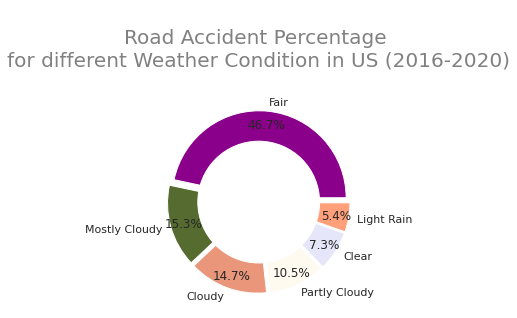

In [ ]:
# Setting size in Chart based on 
# given values
sizes = weather_condition_df2.Cases
  
# Setting labels for items in Chart
labels = weather_condition_df2.Weather_Condition
  
# colors
colors = ['DarkMagenta','DarkOliveGreen','DarkSalmon','FloralWhite','Lavender','LightSalmon']
  
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(sizes,  colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('\nRoad Accident Percentage \nfor different Weather Condition in US (2016-2020)\n', size=20, color='grey')
  
# Add Legends
#plt.legend(labels,loc='loweer left', title="Weather Condition")
  
# Displaying Chart
plt.show()

In most of the cases (46.7%) the weather was Fair and approximately in 15% cases it was mostly cloudy. 

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents


'https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents'

**Analysis of the Climate Variables during the Accidents**

Main climate variables are: temperature, relative humidity, precipitation, wind, waves and tides etc.

In [ ]:
weather_condition_df.head(4)

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain
1,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain
2,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast
3,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast


```generate_intervals_labels``` functions to categorise the temperature, humditiy etc to a range of values

In [ ]:

def generate_intervals_labels(df,column_name, split, gap):#consist of 4 inputs dataframe, column_name,
    var_min = min(df[column_name])
    intervals = [int(var_min)]
    labels = []
    for i in range(1, split+1):
        
        lower_limit = int(var_min+((i-1)*gap))
        
        if i==split:
            upper_limit = int(max(df[column_name]))
        else:
            upper_limit = int(var_min + (i*gap))
            
        #intervals
        intervals.append(upper_limit)
        
        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)    
    
    return intervals, labels

In [ ]:
def Feature_Bin_Plot(dataframe, column_name, intervals, labels, fig_size, font_size, y_lim, adjust, title):
    
    new_df = dataframe.copy()
    xlabel = 'Different {} Grouped Value'.format(column_name)
    new_df[xlabel] = pd.cut(x = new_df[column_name], bins = intervals, labels = labels, include_lowest=True)
    temp_df = pd.DataFrame(new_df[xlabel].value_counts()).reset_index().rename(columns={'index':'Bins', xlabel:'Cases'}).sort_values('Bins')
    count,max_index = 0, 0
    cases_list = list(temp_df['Cases'])
    for i in cases_list:
        if i == max(temp_df['Cases']):
            max_index = count
            break
        count += 1
                                                                                               
    total = len(new_df[xlabel])
    plt.figure(figsize=fig_size)
    
  # Create an array with the colors you want to use
    colors = ["#FF0B04", "#4374B3"]
  # Set your custom color palette
    customPalette = sns.set_palette(sns.color_palette(colors))
    
    ax=sns.barplot(y=temp_df['Cases'], x=temp_df['Bins'], palette=customPalette);
    
    for i in ax.patches:
        ax.text(i.get_x()+adjust[0], i.get_height()+adjust[-1], \
            '{:,d}\nCases\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=font_size,
                color='black')
    

        
    plt.title(title, size=20, color='grey')
    plt.ylim(y_lim)
    
    for i in ['bottom', 'top', 'left', 'right']:
        ax.spines[i].set_color('white')
        ax.spines[i].set_linewidth(1.5)
        
    ax.set_xlabel('\n{}\n'.format(xlabel), fontsize=15, color='grey')
    ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')
    
    ax.set_axisbelow(True)
    ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
    ax.tick_params(axis='both', which='major', labelsize=12)
    

**Temperature**
Shows the temperature during the accident (in Fahrenheit).	

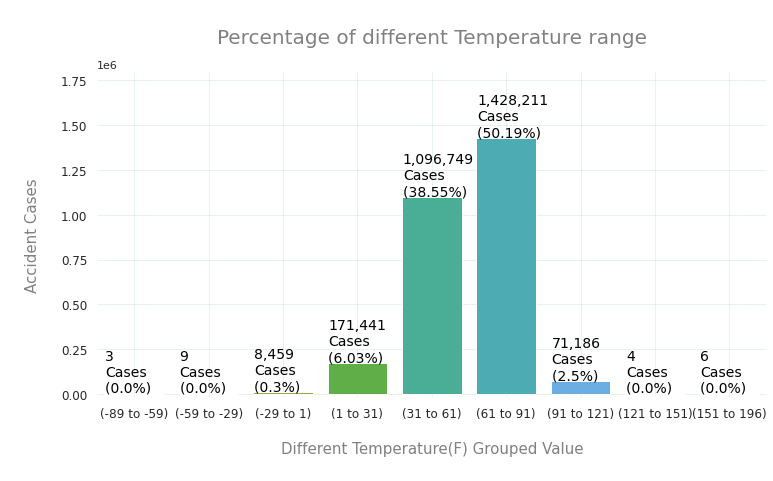

In [ ]:
#for temperature
temp_intervals, temp_labels = generate_intervals_labels(weather_condition_df,'Temperature(F)', 9, 30)
Feature_Bin_Plot(weather_condition_df, 'Temperature(F)',temp_intervals, temp_labels, 
                 (12, 6), 14, (-20000, 1800000), [0.01, 10000], '\nPercentage of different Temperature range\n')

- In the temperature range of 61(F) - 91(F), 50% of the road accidents occurred.

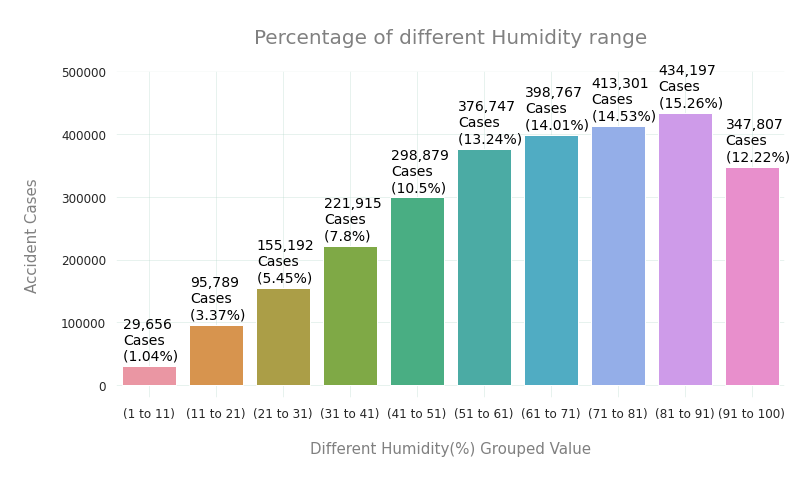

In [ ]:
Humidity_intervals, Humidity_labels = generate_intervals_labels(weather_condition_df,'Humidity(%)', 10, 10)

Feature_Bin_Plot(weather_condition_df, 'Humidity(%)', Humidity_intervals, Humidity_labels, 
                 (12, 6), 14, (-20000, 500000), [0.01, 10000], '\nPercentage of different Humidity range\n')

- Maximum accident cases about 16% occured in humidity(81-91)% 

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1PKxlMSZjyJcv1X8PIJ8CLUQb9nl_gxdH" align="left" hspace="10px" vspace="0px" width="35" height="40" ></p>

#### <font size="4">**Road Condition Analysis**</font>

In [ ]:
road_conditions = ['Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop','Railway', 'No_Exit', 'Traffic_Signal', 'Turning_Loop','Roundabout','Station','Traffic_Calming']

In [ ]:
def condition(df,road_conditions):
  #creating a list of cases occuring
  mylist = []
  for i in range(0,len(road_conditions)):
    mylist.append(df[road_conditions[i]].values.sum())

  #creating a pandas series
  road_df = pd.Series(np.array(mylist), index=road_conditions)
  
  return road_df


  

In [ ]:
roads_df = condition(us_accidents_df,road_conditions)

In [ ]:
roads_df1 = pd.DataFrame(roads_df).reset_index().rename(columns = {'index': 'Road_Condition',0:'Accident_Cases'}).sort_values(by ='Accident_Cases',ascending = False)

**Plotly** provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.

In [ ]:
import plotly.express as px


fig = px.bar(roads_df1, y="Road_Condition", x="Accident_Cases", text_auto='.2s',title= 'Accident due to Road Conditions', color = "Road_Condition")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)




- Most of the accidents occured in ```junctions```

- There are no accident cases recorded near the ```Turning Loop```.

**Word clouds** (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

In [ ]:
from wordcloud import WordCloud

In [ ]:
road_condition_df = roads_df.to_frame().reset_index().rename(columns={'index':'Road_Condition',0:'Cases'}).sort_values(by='Cases',ascending=False)


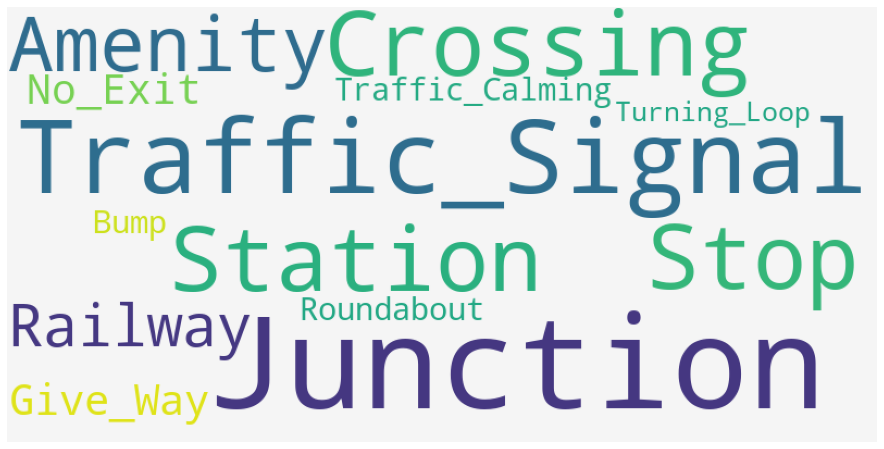

In [ ]:
words = ' '.join((job for job in road_condition_df.Road_Condition.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='WhiteSmoke').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents


'https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents'

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1sJtIStrGS6tRxrEq0Q-9Q2_oc8HgHRim" align="left" hspace="10px" vspace="0px" width="20" height="30" ></p>

#### <font size="4">**Location Analysis**</font>


In this dataset, we have different attributes like City, State,County even street for each accident records. Here we will analyze these four features based on the no. of cases for each distinct location.

In [ ]:
# create a dataframe of State and their corresponding accident cases
state_df = pd.DataFrame(us_accidents_df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'}).sort_values(by='Cases',ascending=False)


We will be using ```convert``` function to fetch the names of the us state from the abbrevation with the help of the dictionary we created ``` us_states```

In [ ]:
# create a dictionary using US State code and their corresponding Name
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}


In [ ]:
def convert(x): 
  return us_states[x]

state_df['State'] = state_df['State'].apply(convert)

In [ ]:
 total_cases = state_df.Cases.sum()

In [ ]:
state_df['Accident_Rate(%)'] = round((state_df['Cases']/total_cases)*100,2)

In [ ]:
state_df.head(3)

,State,Cases,Accident_Rate(%)
0,California,795868,27.97
1,Florida,401388,14.11
2,Texas,149037,5.24


**GeoPandas** is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.

In [ ]:
pip install geopandas --quiet

     |████████████████████████████████| 1.0 MB 8.4 MB/s 
     |████████████████████████████████| 16.7 MB 44.1 MB/s 
     |████████████████████████████████| 6.3 MB 41.6 MB/s 


In [ ]:
import geopandas as gpd
import branca.colormap as cm

In [ ]:
#fetching the geojson file of the us states

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data"
)
us_states1 = f"{url}/us-states.json"

In [ ]:
#reading the geojson file using geopandas
nil = gpd.read_file(us_states1)
nil.head()

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [ ]:
#renaming the column names to State
nil.rename(columns = {'name':'State'}, inplace = True)

The ***merge()*** method updates the content of two DataFrame by merging them together, using the specified method(s).
- A new DataFrame, with the merged result.This method does not change the original DataFrame.

In [ ]:
#merging the nil and state_df  dataframes on the column State
nilpop=nil.merge(state_df,on="State")
nilpop.head(3)

,id,State,geometry,Cases,Accident_Rate(%)
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",19322,0.68
1,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",56504,1.99
2,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",10935,0.38


**Folium** is a powerful Python library that helps you create several types of Leaflet maps. By default, Folium creates a map in a separate HTML file

In [ ]:
import folium

In [ ]:
#creating a map using folium centered at California
mymap3 = folium.Map(location=[	36.778259,-119.417931], zoom_start=4.25,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap3)




In [ ]:

mymap3.choropleth(
 geo_data=nilpop,
 name='Choropleth',
 data=nilpop,
 columns=['State','Accident_Rate(%)'],
 key_on="feature.properties.State",
 fill_color='OrRd',
 threshold_scale=[0, 5, 9, 13, 17, 21, 25, 28],
 fill_opacity=1,
 line_opacity=0.2,
 legend_name='Accident_Rate(%)',
 smooth_factor=0
)


/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [ ]:
#styling the map to get popup with state and case numbers
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    
    nilpop,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['State','Cases'],
        aliases=['State: ','Accident_Cases: '],
        style=("background-color: lightblue; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
mymap3.add_child(NIL)
mymap3.keep_in_front(NIL)
folium.LayerControl().add_to(mymap3)
mymap3

 - In US, California is the state with highest no. of road accidents in past 6 years.About 30% of the total accident records of past 6 years in US is only from California.
 
- Florida is the 2nd highest (10% cases) state for no. road accidents in US.

## **Ask & Answer Question**

### **Q1. Are the accidents occured during Night is more Severe?**

The severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

In [ ]:
severity_time_df = pd.DataFrame(us_accidents_df[['Severity','Sunrise_Sunset']].value_counts()).reset_index().rename(columns = {'Sunrise_Sunset':'Day/Night',0:'Accident_Cases'})

In [ ]:
severity_time_df

,Severity,Day/Night,Accident_Cases
0,2,Day,1606495
1,2,Night,924124
2,3,Day,107057
3,4,Day,76687
4,4,Night,54018
5,3,Night,48044
6,1,Day,21696
7,1,Night,4354


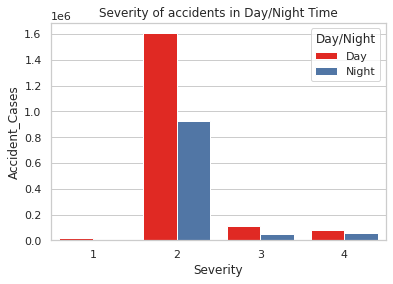

In [ ]:
sns.barplot(x='Severity', y='Accident_Cases', hue='Day/Night', data=severity_time_df)
plt.title('Severity of accidents in Day/Night Time');

- We could see the severe accidents mostly occur duing the day time rather than in the night time 

**No, more of the servere accidents occured in the day time rather than night time.**

### **Q2. Mostly how much time majority of accidents affect the traffic**?

In [ ]:
accident_duration_df = pd.DataFrame(us_accidents_df['End_Time'] - us_accidents_df['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})

In [ ]:
accident_duration_df2 = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10)).reset_index().rename(columns = {'index':'Duration','Duration': 'Cases'})

In [ ]:
Duration = [str(i).split('days')[-1].strip() for i in accident_duration_df2.Duration]

In [ ]:
accident_duration_df2['Duration'] = Duration

In [ ]:
accident_duration_df2

,Duration,Cases
0,06:00:00,353058
1,04:00:00,55394
2,00:15:00,37038
3,00:30:00,35345
4,01:00:00,28845
5,01:15:00,25794
6,01:45:00,24615
7,00:45:00,18568
8,02:00:00,16625
9,00:20:00,12938


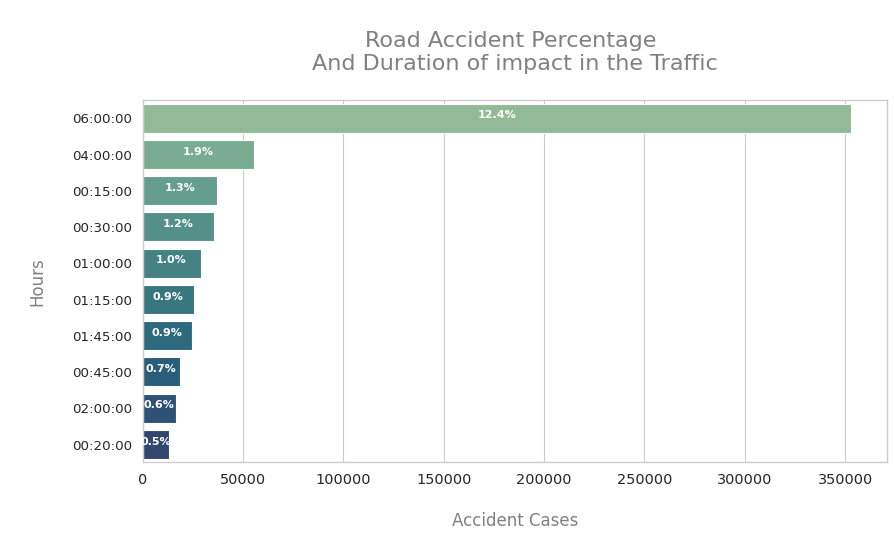

In [ ]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

# Plot the total crashes
ax=sns.barplot(x=accident_duration_df2['Cases'], y=accident_duration_df2['Duration'], palette='crest')

# Add a legend and informative axis label

plt.title('\nRoad Accident Percentage \nAnd Duration of impact in the Traffic\n', size=20, color='grey')
plt.ylabel('\nHours\n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12);

#adding percentage 
total = us_accidents_df.shape[0]
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    y = p.get_y() + p.get_height()/2
    x = p.get_x() + p.get_width()/2 -100
    ax.annotate(percentage, (x, y),rotation=0, size = 10,ha ='center',weight='bold',color='white')

- Majority of accident impacted 6 hours(around 13%) in the traffic flow.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents


'https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents'

### **Q3. Which are the most accident prone cities in US**?

In [ ]:
# create a dataframe of city and their corresponding accident cases
city_df = pd.DataFrame(us_accidents_df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [ ]:
top_six_cities = pd.DataFrame(city_df.head(6))

In [ ]:
top_six_cities

,City,Cases
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448
5,Charlotte,33152


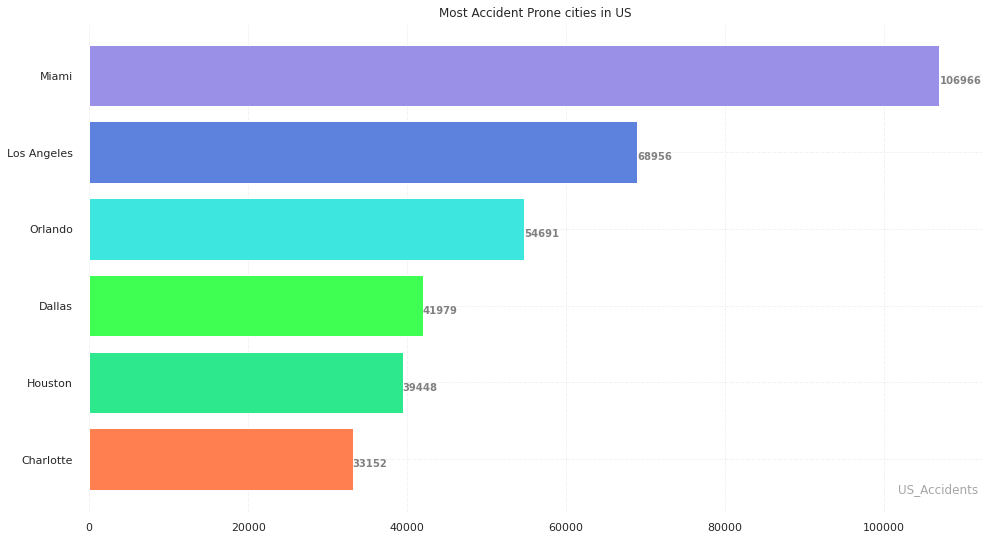

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(top_six_cities['City'], top_six_cities['Cases'],color=['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53','#2ee88e','#FF7F50'])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Most Accident Prone cities in US',
             loc ='Center', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'US_Accidents ', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()


- Miami is the city with highest no. of road accidents in US (2016-2021). 
- Los Angeles is the 2nd highest place with 54,691 road accident cases recorded in the last 5 years.


### **Q.4 Why there is lot accidents happening in Miami? Is this because of the road condition there?**

Miami reports most of the accidents out of the all the cities in US crossing 1 lac accidents over the past 5 years(2016-21).

In [ ]:
#let analyse the road condition over Miami

In [ ]:
 miami_df= us_accidents_df[us_accidents_df['City'] == 'Miami']

In [ ]:
road_conditions = ['Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop','Railway', 'No_Exit', 'Traffic_Signal', 'Turning_Loop','Roundabout','Station','Traffic_Calming']

In [ ]:
miami_road_condition = condition(miami_df,road_conditions)

In [ ]:
miami_roads_df1 = pd.DataFrame(miami_road_condition).reset_index().rename(columns = {'index': 'Road_Condition',0:'Accident_Cases'}).sort_values(by ='Accident_Cases',ascending = False)

In [ ]:
len(miami_df.index)

106966

In [ ]:
condition(miami_df,road_conditions).sum()

59111

From the dataset  we could see that nearly 1,06,966 accidents only occured in Miami and out of them half of the accidents occured due to road condition of Miami(more than 50% of the accidents in mIami). 

- ***We will analyse the accidents occured due to condition of roads in Miami***

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.pie(miami_roads_df1, values='Accident_Cases', names='Road_Condition', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

We could see the major of the accident occured in Miami is due to crossing (33.9%) then at stations(27%)

**Drivers often become impatient and aggressive when faced with Miami's congested roads and bumper-to-bumper traffic as a result the accidents rises in Miami so much**

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents


'https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents'

### **Q5. During what time of the day more accidents occur? Guess why so?**

In [ ]:
hour_df = pd.DataFrame(us_accidents_df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hour', 'Start_Time':'Cases'}).sort_values(by='Hour', ascending=True)

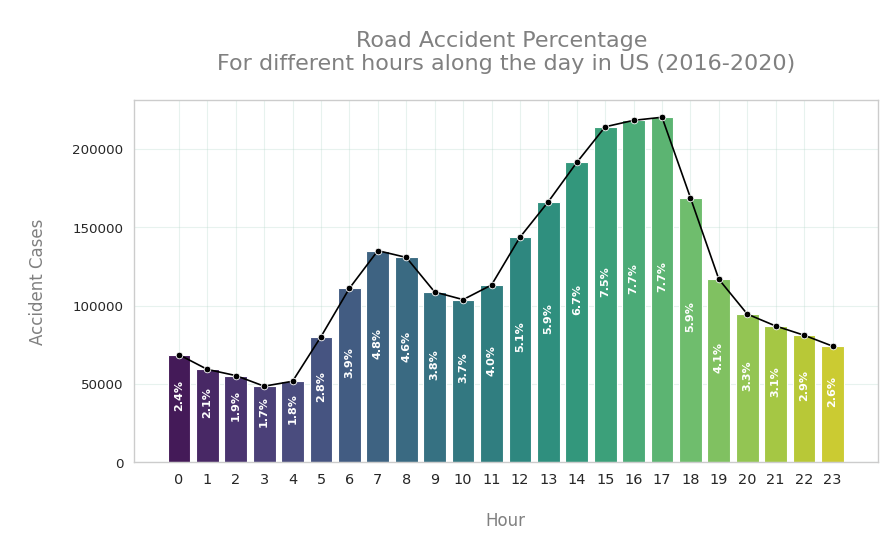

In [ ]:


# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

# Plot the total crashes
ax=sns.barplot(x=hour_df['Hour'], y=hour_df['Cases'], palette='viridis')
ax=sns.lineplot(data = hour_df, marker='o', x='Hour', y='Cases', color = 'black', alpha = 1)

# Add a legend and informative axis label

plt.title('\nRoad Accident Percentage \nFor different hours along the day in US (2016-2020)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nHour\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3);

#adding percentage 
total = us_accidents_df.shape[0]
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()/2 -100
    ax.annotate(percentage, (x, y),rotation=90, size = 10,ha ='center',weight='bold',color='white')




- The most-deadliest accident hours is ```5:00PM and 6:00PM``` implies the Evening Office-Returning Hours.
- The 2nd most-deadliest accident hour is ```8:00AM``` implies the Morning Office-Going Hours.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents


'https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents'




1. using violin plot/box plot,place where accident is more what is the causee for the accident from the road problem and weather.
3. severity is more during accident in the sunset or sunrise, why
4. what is the most accident place due to precipitation and 
5. wind(make polar chart of the place and how strong is there 
6. weather condition and severity of the accident at there





In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents


'https://jovian.ai/makeshmr2409/exploratory-data-analysis-case-study-us-accidents'

### **Q6. How much accidents are occuring in US per day yearly?**

In [ ]:
year_df['accident/day'] = round(year_df['Cases']/(5*365))
year_df['accident/hour'] = round(year_df['Cases']/(5*365*24))

In [ ]:
year_df

,Year,Cases,accident/day,accident/hour
5,2016,122024,67.0,3.0
3,2017,163918,90.0,4.0
4,2018,163176,89.0,4.0
2,2019,258615,142.0,6.0
1,2020,625864,343.0,14.0
0,2021,1511745,828.0,35.0


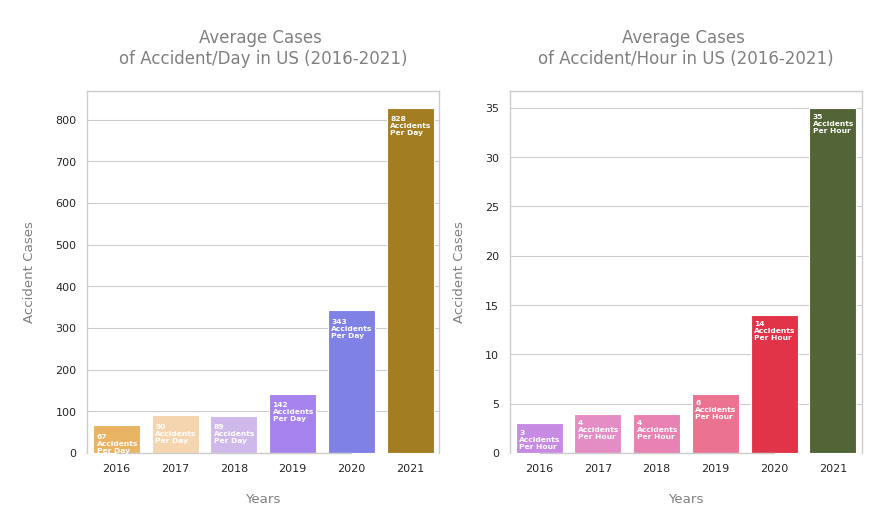

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12.5,6), dpi = 80)

count = 0
plots = ['accident/day', 'accident/hour']
plots_limit = [(-10, 1000), (-0.5, 22.5)]
plots_bound = [(0, 1000), (0, 20)]
plot_text = [65, 2.5]

colors = [['#ffb74b', '#ffd6a4', '#ceb1f2', '#a071ff', '#6f71f7','#B8860B'], 
          ['#cd7cf2', '#f27ec8', '#fa70b3', '#ff5e86', '#ff1732','#556B2F']]


for i in [ax1, ax2]:

    sns.barplot(ax=i, y=year_df[plots[count]], x=year_df['Year'], palette=colors[count])
    var = plots[count].split('/')[-1].capitalize()


    for j in i.patches:
        i.text(j.get_x()+0.06, j.get_height()-plot_text[count], \
                str(int(j.get_height()))+'\nAccidents\nPer {}'.format(var), fontsize=6.74, color='White', weight='bold')
        
    i.axes.set_ylabel('\nAccident Cases\n', fontsize=12, color='grey')
    i.axes.set_xlabel('\nYears\n', fontsize=12, color='grey')
    i.tick_params(axis='both', which='major', labelsize=10)

    i.set_title('\nAverage Cases \nof Accident/{} in US (2016-2021)\n'.format(var), fontsize =15, color='grey')
    i.spines['bottom'].set_bounds(0.005, 4)
    

    count += 1

- **In the year 2021, averagely 828 accidents happened per day in US.**
-  **In the year 2021, averagely 35 accidents happened per hour**


### **Q7. How does covid impacted the accident cases in US?**

**Step 1**: Create/Extract a DataFrame with Datetime values
- In order to convert string to Datetime column we are going to use:pd.DataFrame


In [ ]:
time_df = pd.DataFrame(pd.to_datetime(us_accidents_df['Start_Time'],format='%Y%m%d'))

In [ ]:
time_df

,Start_Time
0,2016-02-08 00:37:08
1,2016-02-08 05:56:20
2,2016-02-08 06:15:39
3,2016-02-08 06:51:45
4,2016-02-08 07:53:43
...,...
2845337,2019-08-23 18:03:25
2845338,2019-08-23 19:11:30
2845339,2019-08-23 19:00:21
2845340,2019-08-23 19:00:21


**Step 2**: Extract Year and Month with .dt.to_period('M') - format YYYY-MM

In [ ]:
time_df['Start_Time'] = time_df['Start_Time'].dt.to_period('M')

In [ ]:
time_df.head(3)

,Start_Time
0,2016-02
1,2016-02
2,2016-02


**Step 3**: Extract Year and Month other formats MM/YYYY
What if you like to get the month first and then the year? In this case we will use .dt.strftime in order to produce a column with format: MM/YYYY or any other format.

In [ ]:
time_df['Start_Time'] = time_df['Start_Time'].dt.strftime('%m/%Y')

In [ ]:
time_df.head(3)

**Step 4**: Extracting Year and Month separately and combine them

A bit faster solution than step 3 plus a trace of the month and year info will be:

- extract month and date to separate columns
- combine both columns into a single one

In [ ]:
time_df['year'] = pd.to_datetime(time_df['Start_Time']).dt.year
time_df['month'] = pd.to_datetime(time_df['Start_Time']).dt.month

In [ ]:
times_df1 = pd.DataFrame(time_df.value_counts()).reset_index().rename(columns={'Start_Time':'Time','year':'Year','month':'Month',0:'Cases'})

In [ ]:
times_df2 = times_df1.pivot("Month", "Year", "Cases")

In [ ]:
times_df2

In [ ]:
plt.title('Accidents Cases in US')
sns.heatmap(times_df2, fmt='d', annot=True, cmap='Greens')
plt.figure(figsize=(30,10));

- We could see, there is drop accident cases in ```July, August``` it might be  due to lockdown because of the accident cases from the graph


In [ ]:
jovian.commit()

### **Q.8 In which visibility range the maximum accident cases occur?**

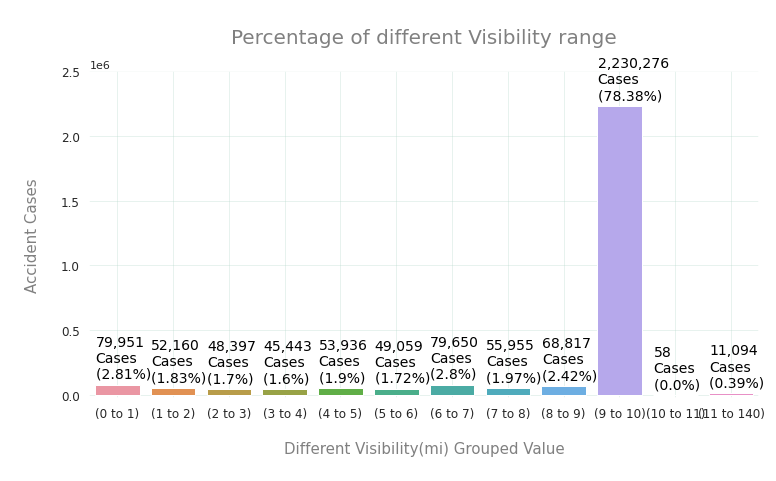

In [ ]:
#for Visibility
Visibility_intervals, Visibility_labels = generate_intervals_labels(weather_condition_df,'Visibility(mi)', 12, 1)

Feature_Bin_Plot(weather_condition_df, 'Visibility(mi)', Visibility_intervals, Visibility_labels, 
                 (12, 6), 14, (-20000, 2500000), [0.01, 50000], '\nPercentage of different Visibility range\n')

- In maximum cases (78.38%) of road accident, the Visibility range is between 9(mi) - 10(mi).

## **Inferences and Conclusions**

We've drawn many inferences from the Dataset. Here's a summary of a few of them:

- Around 90% of the road accidents, the impact on the traffic was Moderate (Severity-2).
-  Over the last 6 years (2016-2021) in US accidents percentage has increased significantly. 75% of the total road accident records of last 6 years happened only within last 2 years (2020, 2021).
- Each year the maximum cases occured in the month December is around(17%) and July & March are the months with least accidents occured and is about (5.6%).
- Working Days of the week have almost 2 times higher accident percentage, compared with the Weekend Days which is as our expectation.
- In most of the cases (46.7%) the weather was Fair and approximately in 15% cases it was mostly cloudy.
- Most of the accidents occured in ```junctions```.There are no accident cases recorded near the ```Turning Loop```.
- In US, California is the state with highest no. of road accidents in past 6 years.About 30% of the total accident records of past 6 years in US is only from California.
- Majority of accident impacted 6 hours(around 13%) in the traffic flow.
- Miami is the city with highest no. of road accidents in US (2016-2021).Los Angeles is the 2nd highest place with 54,691 road accident cases recorded in the last 6 years.
- The most-deadliest accident hours is ```5:00PM and 6:00PM``` implies the Evening Office-Returning Hours.
- The 2nd most-deadliest accident hour is ```8:00AM``` implies the Morning Office-Going Hours.





## **Exercises**

There's a wealth of information to be discovered using the survey, and we've barely scratched the surface. Here are some ideas for further exploration:

- Repeat the analysis for different County, Street etc.
- We haven't selected some columns such as streets, sides weather_timestamp etc,  for analysis we can extend our analysis and draw out how reduce the accidents in streets etc. 
- Comparing the result of accidents occuring in each year w.r.t to different location and can be used to reduce rise in accidents

## **References**

1. [Kaggle](https://www.kaggle.com/)
2. [Wikipedia](https://en.wikipedia.org/wiki/Main_Page)
3. [Jovian.ai](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/web-scraping-and-rest-apis)
4. [Medium](https://medium.com/)
5. [https://i.imgur.com](https://i.imgur.com)

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="blank-starter")